### Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import linear_model, metrics
from sklearn.cross_validation import train_test_split, cross_val_score
from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline

### Data pre-processing

In [2]:
dta= load_iris()
df = pd.DataFrame(dta.data)
df.columns = [x.split()[0] + '_' + x.split()[1] for x in dta.feature_names]
df['target'] = dta.target
df['target_name'] = dta.target_names[df.target]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Exploration

In [3]:
df.groupby(df.target_name).mean()

,sepal_length,sepal_width,petal_length,petal_width,target
target_name,,,,,
setosa,5.006,3.418,1.464,0.244,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


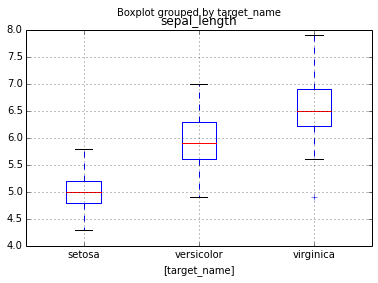

In [4]:
df.boxplot(column='sepal_length', by='target_name')

For setosa type iris sepal length is short. 

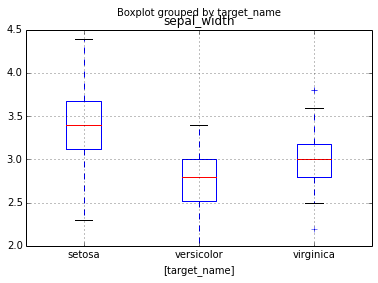

In [5]:
df.boxplot(column='sepal_width', by='target_name')

For setosa type iris sepal width is high. Let's check the combination of both in scatter plot if it can be differentiated.

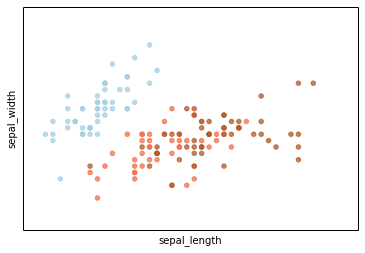

In [6]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['target'], alpha=0.75, edgecolors='face', cmap=plt.cm.Paired)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.xticks(())
xx = plt.yticks(())

Combination of iris sepal length and sepal width will seperates setosa from others. Let us use this for ML.
### Preparing Data for Logistic Regression
Add an intercept and make a dummy variable to hold sepal length and sepal width.

In [7]:
y, X = dmatrices('target ~ sepal_length + sepal_width', df, return_type='dataframe')
X.columns
y['target'] = (y.target < 1).astype(int)
#flattern y into a 1-D array
y = np.ravel(y)

Dividing Data into Test set and Training set. with 30% data as test set.

In [8]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Model Evaluation Using a Validation Set

In [9]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction and Prediction score 

In [10]:
predicted = logit.predict(X_test)
probs = logit.predict_proba(X_test)

In [11]:
# Generate evaluation matrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

1.0
1.0


We get 100% accuracy and 100% on ROC score.
### Model Evaluation using cross validation

In [12]:
# 10 fold cross validation
scores = cross_val_score(linear_model.LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 1.          1.          1.          1.          1.          1.          1.
  1.          0.93333333  1.        ]
0.993333333333


Cross validation score is 99.33 %

In [13]:
coef= logit.coef_.tolist().pop()
pd.DataFrame(zip(X.columns, np.transpose(logit.coef_)))

,0,1
0,Intercept,[0.700388951226]
1,sepal_length,[-2.25427157536]
2,sepal_width,[3.41249962349]


In [15]:
a2, a1, a0 = coef[2], coef[1], coef[0]
print a2, a1, a0

3.41249962349 -2.25427157536 0.700388951226
